In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
np.random.seed(7)

In [2]:
model=keras.models.load_model('./lstm_memory.h5')

2021-11-12 21:06:43.617029: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-12 21:06:43.632328: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2021-11-12 21:06:43.632365: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1835] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-12 21:06:43.633097: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN

In [3]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [4]:
# load the dataset
dataframe = pd.read_csv('/home/sh4n1/miniproj/h1cpudata.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
batch_size = 1
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [5]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

2021-11-12 21:06:44.401139: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [6]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [7]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 621.37 RMSE
Test Score: 1316.47 RMSE


In [8]:
testX

array([[[0.00085587],
        [0.0006847 ],
        [0.00085587]],

       [[0.0006847 ],
        [0.00085587],
        [0.00102705]],

       [[0.00085587],
        [0.00102705],
        [0.00110041]],

       ...,

       [[0.00239644],
        [0.00171174],
        [0.00222527]],

       [[0.00171174],
        [0.00222527],
        [0.00205409]],

       [[0.00222527],
        [0.00205409],
        [0.00154057]]], dtype=float32)

In [9]:
testPredict

array([[606.2869 ],
       [270.74258],
       [ 92.43922],
       ...,
       [ 82.32187],
       [ 64.99402],
       [ 71.9667 ]], dtype=float32)

In [10]:
print(len(testY[0]),len(testPredict))

2846 2846


In [11]:
diff=0
for i in range(0,2846):
    diff=diff+(abs(testY[0][i]-testPredict[i]))

In [12]:
diff

array([1021322.9], dtype=float32)

In [13]:
diff/2846

array([358.86258], dtype=float32)

In [14]:
X=range(1,2847)

(2800.0, 2847.0)

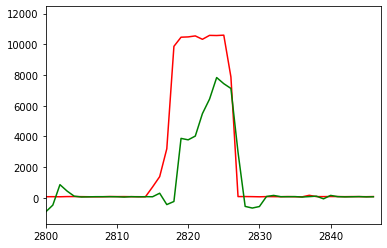

In [15]:
plt.plot(X, testY[0], color='r', label='actual')
plt.plot(X, testPredict, color='g', label='predicted')
plt.xlim(2800,2847)
#plt.ylim(0,200)